In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings

warnings.filterwarnings('ignore')

cust_df = pd.read_csv(r"C:\EURON\수업자료\train_santander.csv.csv", encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [3]:
 cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [4]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 베율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

TARGET
0    73012
1     3008
Name: count, dtype: int64
unsatisfied 베율은 0.04


In [5]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [6]:
cust_df['var3'].replace(-999999, 2, inplace=True) 
cust_df.drop('ID', axis=1, inplace=True)

X_features = cust_df.iloc[:, :-1] 
y_labels = cust_df.iloc[:, -1] 
print('피처 데이터 shape：{0}'.format(X_features.shape))

피처 데이터 shape：(76020, 369)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test. count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))
print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt) 
print('\n 테스트 세트 레이블 값 분포 비율') 
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
학습 세트 레이블 값 분포 비율
TARGET
0    0.960964
1    0.039036
Name: count, dtype: float64

 테스트 세트 레이블 값 분포 비율
TARGET
0    0.9583
1    0.0417
Name: count, dtype: float64


In [8]:
 X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [14]:
pip install --upgrade xgboost

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install xgboost==1.7.6

   ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/70.9 MB 4.6 MB/s eta 0:00:16
    --------------------------------------- 1.3/70.9 MB 3.0 MB/s eta 0:00:24
   - -------------------------------------- 2.4/70.9 MB 3.9 MB/s eta 0:00:18
   -- ------------------------------------- 3.7/70.9 MB 4.6 MB/s eta 0:00:15
   -- ------------------------------------- 4.5/70.9 MB 4.4 MB/s eta 0:00:16
   -- ------------------------------------- 5.0/70.9 MB 4.4 MB/s eta 0:00:15
   --- ------------------------------------ 5.8/70.9 MB 4.0 MB/s eta 0:00:17
   --- ------------------------------------ 6.6/70.9 MB 3.9 MB/s eta 0:00:17
   ---- ----------------------------------- 7.3/70.9 MB 4.1 MB/s eta 0:00:16
   ---- ----------------------------------- 7.9/70.9 MB 3.8 MB/s eta 0:00:17
   ---- ----------------------------------- 8.7/70.9 MB 3.8 MB/s eta 0:00:17
   ----- ---------------------------------- 10.0/70.9 MB 4.0 MB/s eta 0:00:16
   --

  You can safely remove it manually.


In [9]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=156)

xgb_clf.fit(
    X_tr, y_tr,
    early_stopping_rounds=100,
    eval_metric='auc',
    eval_set=[(X_tr, y_tr), (X_val, y_val)],
    verbose=True
)

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82179	validation_1-auc:0.80068
[1]	validation_0-auc:0.82347	validation_1-auc:0.80523
[2]	validation_0-auc:0.83178	validation_1-auc:0.81097
[3]	validation_0-auc:0.83401	validation_1-auc:0.81091
[4]	validation_0-auc:0.83443	validation_1-auc:0.81040
[5]	validation_0-auc:0.83570	validation_1-auc:0.81089
[6]	validation_0-auc:0.83597	validation_1-auc:0.81057
[7]	validation_0-auc:0.83643	validation_1-auc:0.81082
[8]	validation_0-auc:0.83682	validation_1-auc:0.81147
[9]	validation_0-auc:0.83769	validation_1-auc:0.81188
[10]	validation_0-auc:0.83770	validation_1-auc:0.81163
[11]	validation_0-auc:0.83911	validation_1-auc:0.81355
[12]	validation_0-auc:0.83976	validation_1-auc:0.81336
[13]	validation_0-auc:0.84038	validation_1-auc:0.81365
[14]	validation_0-auc:0.84176	validation_1-auc:0.81419
[15]	validation_0-auc:0.84306	validation_1-auc:0.81586
[16]	validation_0-auc:0.84343	validation_1-auc:0.81610
[17]	validation_0-auc:0.84373	validation_1-auc:0.81584
[18]	validation_0-au

In [10]:
from hyperopt import hp

xgb_search_space = {
    'max_depth': hp.quniform('max_depth', 5, 15, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
}

In [11]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from hyperopt import STATUS_OK

def objective_func(search_space):
    xgb_clf = XGBClassifier(
        n_estimators=100,
        max_depth=int(search_space['max_depth']),
        min_child_weight=int(search_space['min_child_weight']),
        colsample_bytree=search_space['colsample_bytree'],
        learning_rate=search_space['learning_rate'],
        eval_metric='auc',
        random_state=156
    )
    
    kf = KFold(n_splits=5, shuffle=True, random_state=156)
    auc_scores = cross_val_score(xgb_clf, X_tr, y_tr, scoring='roc_auc', cv=kf)
    mean_auc = auc_scores.mean()
    
    return {'loss': -mean_auc, 'status': STATUS_OK}

In [23]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import roc_auc_score
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK

# ===============================
# 1️⃣ 데이터 불러오기
# ===============================
file_path = r"C:\EURON\수업자료\train_santander.csv.csv"
data = pd.read_csv(file_path)
print("데이터 크기:", data.shape)
print(data.head(2))

# ===============================
# 2️⃣ Feature / Target 분리
# ===============================
X = data.drop(['TARGET', 'ID'], axis=1)
y = data['TARGET']

# 학습/검증/테스트 데이터 분리
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=156)
X_tr, X_val, y_tr, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=156)  # 0.25×0.8=0.2

# ===============================
# 3️⃣ Hyperopt 탐색 공간 설정
# ===============================
xgb_search_space = {
    'max_depth': hp.quniform('max_depth', 5, 15, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
}

# ===============================
# 4️⃣ 목적 함수 정의
# ===============================
def objective_func(params):
    model = XGBClassifier(
        n_estimators=100,
        max_depth=int(params['max_depth']),
        min_child_weight=int(params['min_child_weight']),
        colsample_bytree=float(params['colsample_bytree']),
        learning_rate=float(params['learning_rate']),
        random_state=156,
        eval_metric='auc',
        use_label_encoder=False
    )
    kf = KFold(n_splits=5, shuffle=True, random_state=156)
    auc_scores = cross_val_score(model, X_tr, y_tr, scoring='roc_auc', cv=kf)
    mean_auc = np.mean(auc_scores)
    return {'loss': -mean_auc, 'status': STATUS_OK}

# ===============================
# 5️⃣ Hyperopt 실행
# ===============================
trials = Trials()
best = fmin(
    fn=objective_func,
    space=xgb_search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials,
    rstate=np.random.default_rng(seed=30)
)

print("\n✅ 탐색 완료!")
print("best:", best)

# ===============================
# 6️⃣ 최적 하이퍼파라미터로 재학습
# ===============================
xgb_clf = XGBClassifier(
    n_estimators=500,
    learning_rate=round(best['learning_rate'], 5),
    max_depth=int(best['max_depth']),
    min_child_weight=int(best['min_child_weight']),
    colsample_bytree=round(best['colsample_bytree'], 5),
    random_state=156,
    eval_metric='auc',
    use_label_encoder=False
)

xgb_clf.fit(
    X_tr, y_tr,
    early_stopping_rounds=100,
    eval_set=[(X_tr, y_tr), (X_val, y_val)],
    verbose=False
)

# ===============================
# 7️⃣ 테스트 데이터 평가
# ===============================
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))


데이터 크기: (76020, 371)
   ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
0                      0.0                      0.0  ...   
1                      0.0                      0.0  ...   

   saldo_medio_var33_hace2  saldo_medio_var33_hace3  saldo_medio_var33_ult1  \
0                      0.0                      0.0                     0.0   
1                      0.0                      0.0                     0.0   

   saldo_medio_var33_ult3  saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
0                     0.0             

job exception: 'dict' object has no attribute 'classifier_tags'



  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]


AttributeError: 'dict' object has no attribute 'classifier_tags'

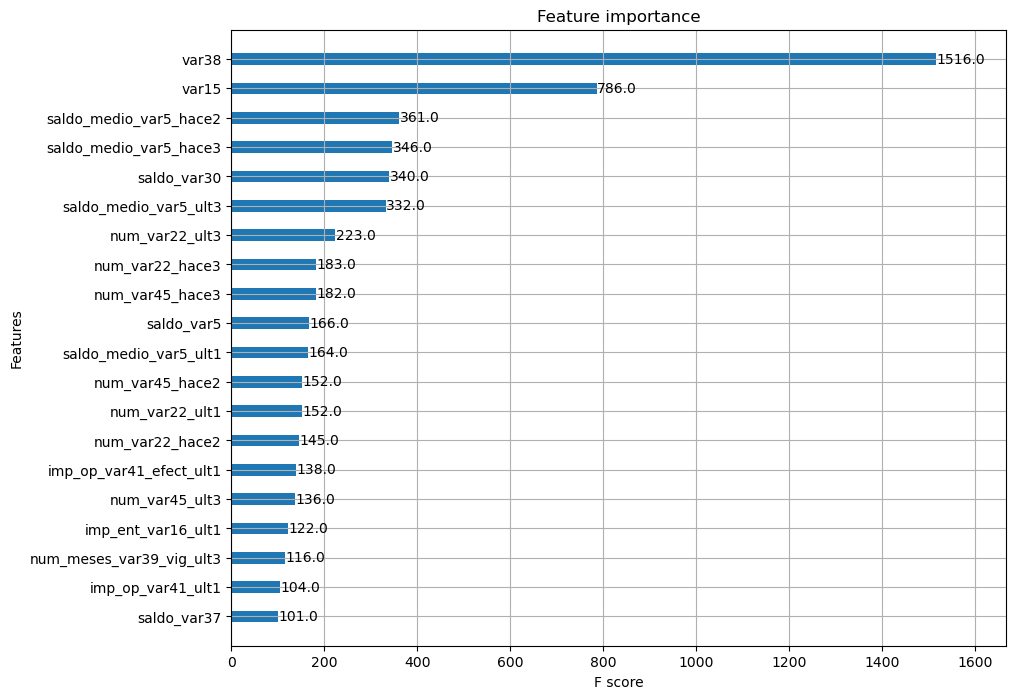

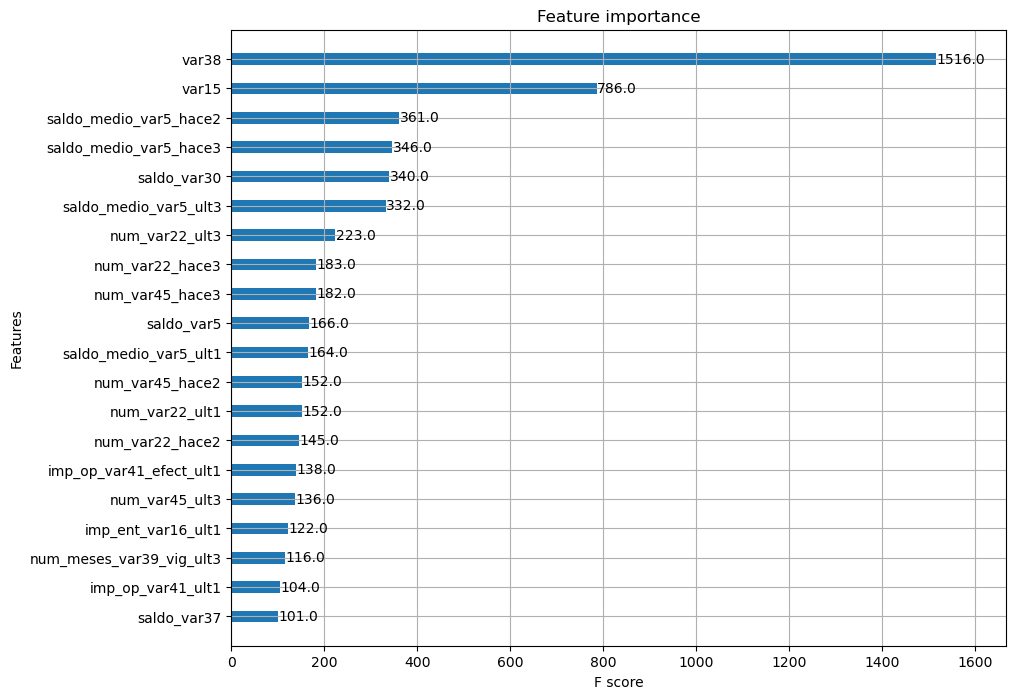

In [26]:
from xgboost import plot_importance 
import matplotlib.pyplot as plt 
%matplotlib inline

fig, ax = pit.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)
plt.show()

In [27]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

lgbm_clf = LGBMClassifier(n_estimators=500)

eval_set = [(X_tr, y_tr), (X_val, y_val)]

lgbm_clf.fit(
    X_tr, y_tr,
    early_stopping_rounds=100,
    eval_metric='auc',
    eval_set=eval_set,
    verbose=False
)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {:.4f}'.format(lgbm_roc_score))

ROC AUC: 0.8380


In [28]:
from hyperopt import hp

lgbm_search_space = {
    'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
    'max_depth': hp.quniform('max_depth', 100, 160, 1),
    'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
    'subsample': hp.uniform('subsample', 0.7, 1.0),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
}

In [29]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import numpy as np

def objective_func(search_space):
    lgbm_clf = LGBMClassifier(
        n_estimators=100,
        num_leaves=int(search_space['num_leaves']),
        max_depth=int(search_space['max_depth']),
        min_child_samples=int(search_space['min_child_samples']),
        subsample=search_space['subsample'],
        learning_rate=search_space['learning_rate']
    )

    roc_auc_list = []
    kf = KFold(n_splits=3, shuffle=True, random_state=42)

    for tr_index, val_index in kf.split(X_train):
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        lgbm_clf.fit(
            X_tr, y_tr,
            early_stopping_rounds=30,
            eval_metric='auc',
            eval_set=[(X_tr, y_tr), (X_val, y_val)],
            verbose=False
        )

        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)

    return -1 * np.mean(roc_auc_list)

In [31]:
from hyperopt import fmin, tpe, Trials 

trials = Trials()
best = fmin(
    fn=objective_func,
    space=lgbm_search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials,
    rstate=np.random.default_rng(seed=30)
)

print('best:', best)

100%|██████████| 50/50 [02:30<00:00,  3.02s/trial, best loss: -0.8345124940760787]
best: {'learning_rate': np.float64(0.037973588831243014), 'max_depth': np.float64(146.0), 'min_child_samples': np.float64(60.0), 'num_leaves': np.float64(36.0), 'subsample': np.float64(0.8701084901926681)}


In [32]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

lgbm_clf = LGBMClassifier(
    n_estimators=500,
    num_leaves=int(best['num_leaves']),
    max_depth=int(best['max_depth']),
    min_child_samples=int(best['min_child_samples']),
    subsample=round(best['subsample'], 5),
    learning_rate=round(best['learning_rate'], 5)
)

lgbm_clf.fit(
    X_tr, y_tr,
    early_stopping_rounds=100,
    eval_metric="auc",
    eval_set=[(X_tr, y_tr), (X_val, y_val)],
    verbose=False
)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

ROC AUC: 0.8390
